In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import dash
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [2]:
df_heart_diseases = pd.read_csv('heart.csv')

In [3]:
print(df_heart_diseases.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
X = df_heart_diseases.drop("HeartDisease", axis=1)
y = df_heart_diseases["HeartDisease"]


In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [7]:
X_train.shape, X_test.shape

((734, 15), (184, 15))

KNN

In [8]:
train_accuracies = []
test_accuracies = []

In [9]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_score)
    test_accuracies.append(test_score)
    
    print(f"K={k}: Train Accuracy = {train_score:.2f}, Test Accuracy = {test_score:.2f}")

K=1: Train Accuracy = 1.00, Test Accuracy = 0.66
K=2: Train Accuracy = 0.83, Test Accuracy = 0.65
K=3: Train Accuracy = 0.83, Test Accuracy = 0.64
K=4: Train Accuracy = 0.78, Test Accuracy = 0.67
K=5: Train Accuracy = 0.79, Test Accuracy = 0.69
K=6: Train Accuracy = 0.76, Test Accuracy = 0.70
K=7: Train Accuracy = 0.77, Test Accuracy = 0.72
K=8: Train Accuracy = 0.75, Test Accuracy = 0.70
K=9: Train Accuracy = 0.77, Test Accuracy = 0.70
K=10: Train Accuracy = 0.77, Test Accuracy = 0.70
K=11: Train Accuracy = 0.77, Test Accuracy = 0.72
K=12: Train Accuracy = 0.75, Test Accuracy = 0.70
K=13: Train Accuracy = 0.76, Test Accuracy = 0.72
K=14: Train Accuracy = 0.76, Test Accuracy = 0.71
K=15: Train Accuracy = 0.75, Test Accuracy = 0.72
K=16: Train Accuracy = 0.74, Test Accuracy = 0.70
K=17: Train Accuracy = 0.74, Test Accuracy = 0.72
K=18: Train Accuracy = 0.73, Test Accuracy = 0.69
K=19: Train Accuracy = 0.74, Test Accuracy = 0.69
K=20: Train Accuracy = 0.73, Test Accuracy = 0.66


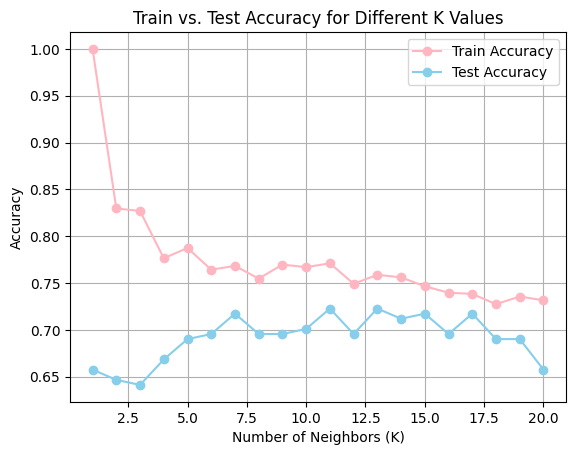

In [10]:
plt.plot(range(1, 21), train_accuracies, marker='o', color='lightpink', label="Train Accuracy")
plt.plot(range(1, 21), test_accuracies, marker='o',color='skyblue', label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Train vs. Test Accuracy for Different K Values")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
K=7
knn=KNeighborsClassifier(K)
knn.fit(X_train, y_train)
y_pred_sklearn= knn.predict(X_test)
print(y_pred_sklearn)

[1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1
 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1]


K-fold

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=15)

scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Median accuracy: {np.median(scores):.2f}")
print(f"Standard deviation: {np.std(scores):.2f}")
print(f"Minimum accuracy: {np.min(scores):.2f}")
print(f"Maximum accuracy: {np.max(scores):.2f}")


Accuracy scores for each fold: [0.88636364 0.90839695 0.85496183 0.88549618 0.88549618 0.84732824
 0.83969466]
Mean accuracy: 0.87
Median accuracy: 0.89
Standard deviation: 0.02
Minimum accuracy: 0.84
Maximum accuracy: 0.91
